# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler

import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Kelompok Pekerjaan 1: Data Understanding

In [13]:
df = pd.read_csv("../csv/gt_all.csv")
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


## Informasi statistikal dataset

In [15]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


## Mengecek data kosong (null value)

In [16]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

## Mengecek data kosong

In [17]:
df.duplicated().sum()

np.int64(7)

## Histogram (persebaran data)

array([[<Axes: title={'center': 'AT'}>, <Axes: title={'center': 'AP'}>,
        <Axes: title={'center': 'AH'}>],
       [<Axes: title={'center': 'AFDP'}>,
        <Axes: title={'center': 'GTEP'}>,
        <Axes: title={'center': 'TIT'}>],
       [<Axes: title={'center': 'TAT'}>, <Axes: title={'center': 'TEY'}>,
        <Axes: title={'center': 'CDP'}>],
       [<Axes: title={'center': 'CO'}>, <Axes: title={'center': 'NOX'}>,
        <Axes: >]], dtype=object)

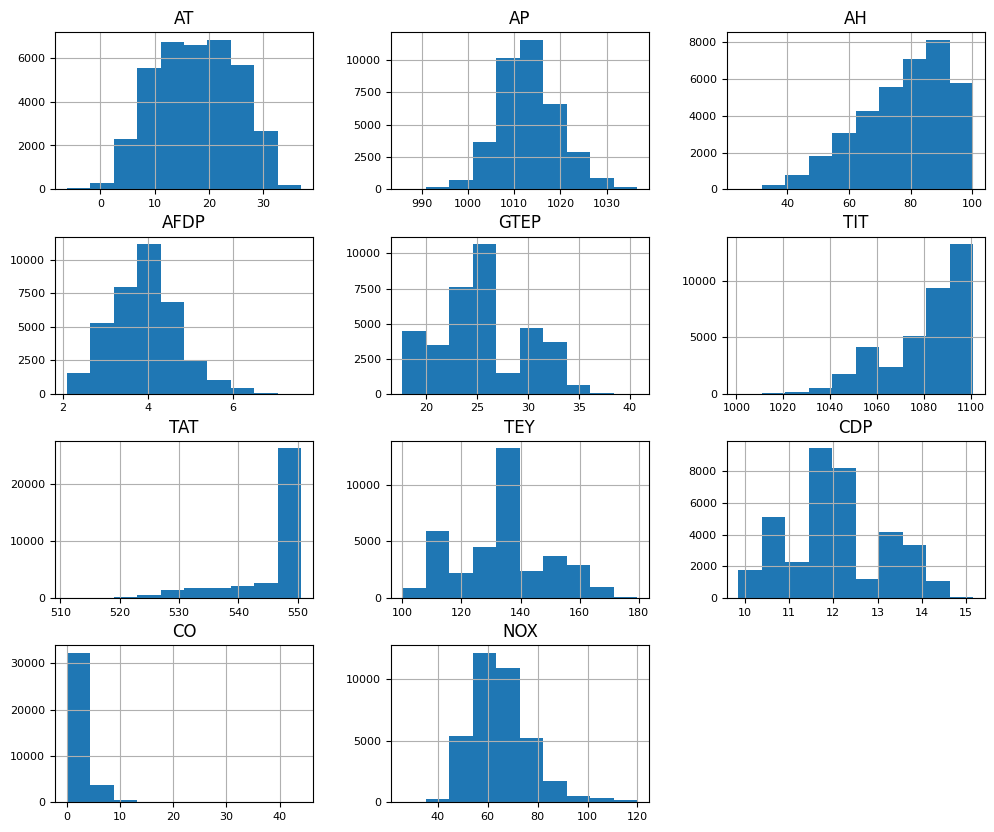

In [18]:
df.hist(figsize=(12, 10),xlabelsize=8, ylabelsize=8)

## Heatmap

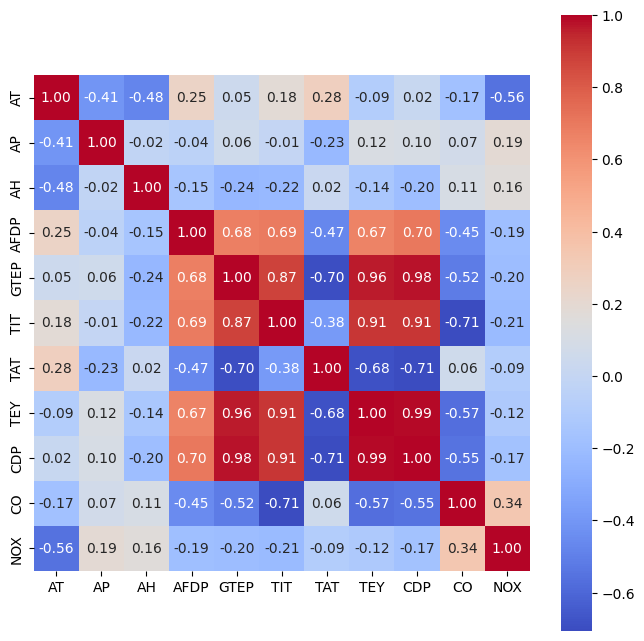

In [19]:
corrmat = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corrmat, cmap="coolwarm", square=True, annot=True, fmt='.2f')
plt.show()

## Mengecek outlier

In [20]:
cols = df.columns.tolist()
cols

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

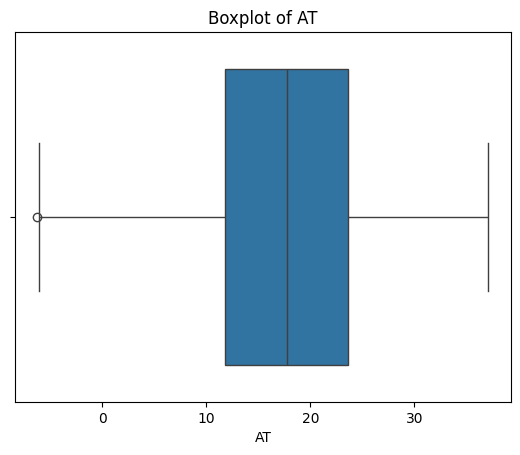

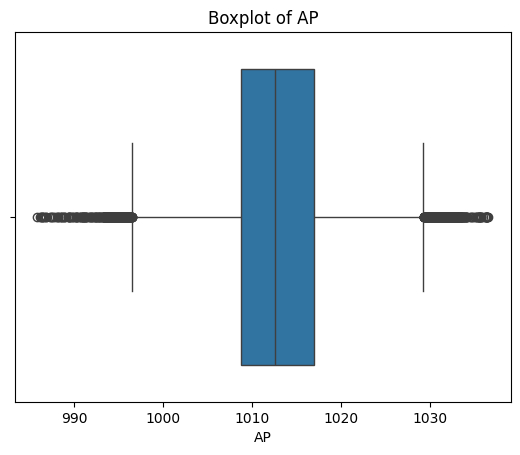

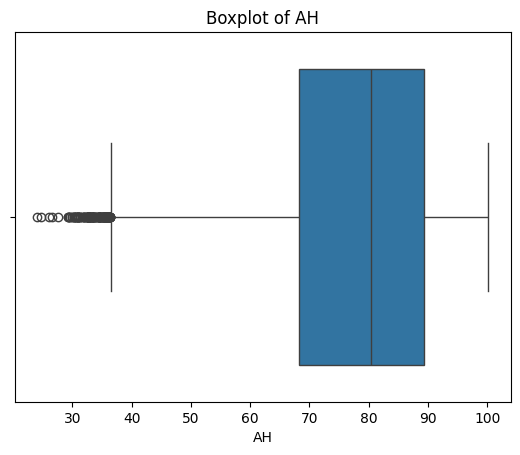

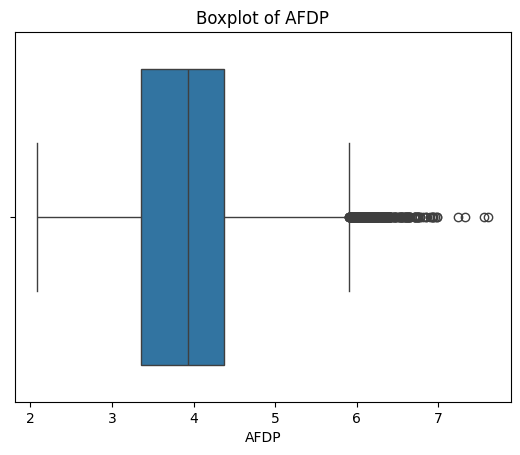

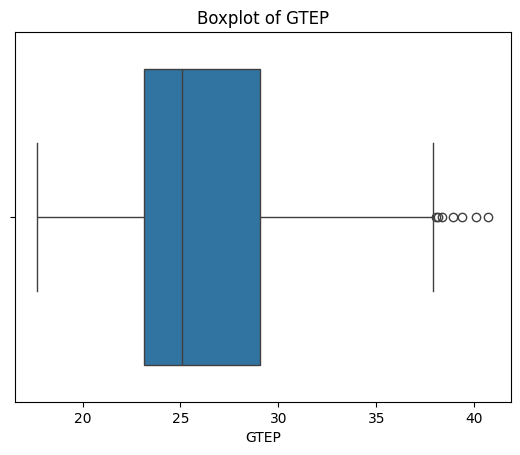

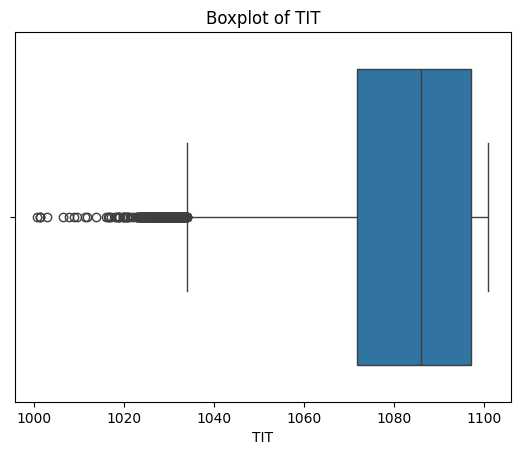

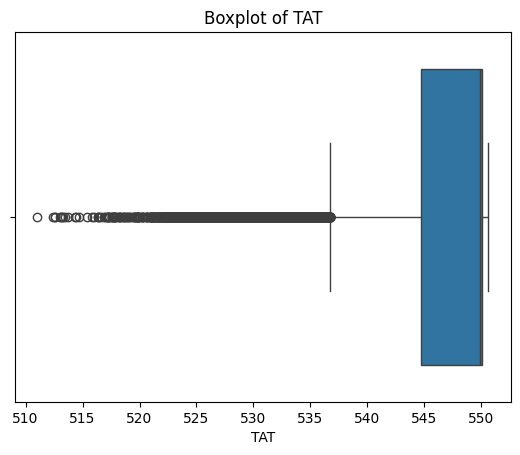

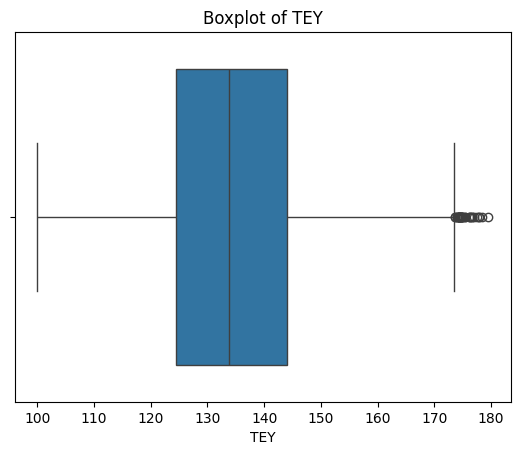

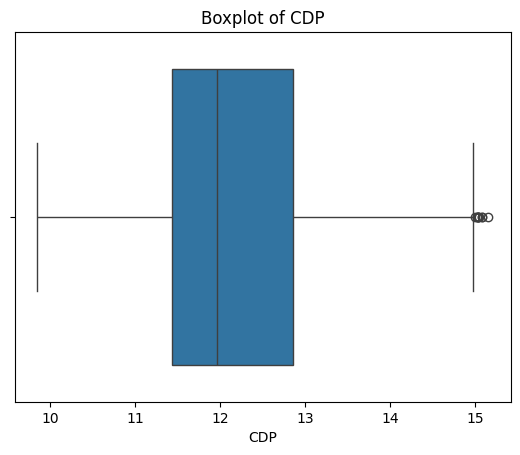

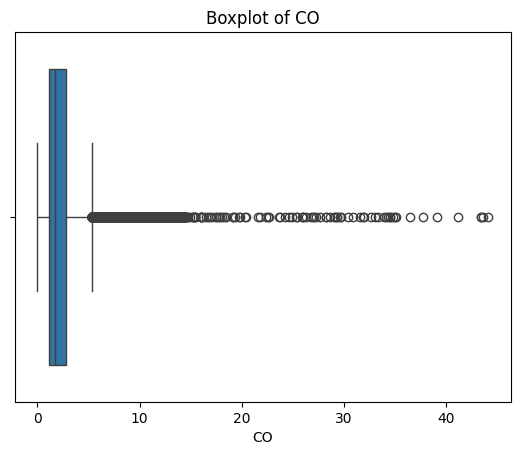

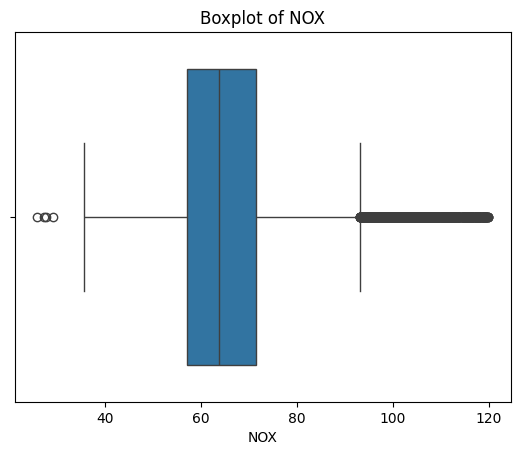

In [21]:
for col in cols:
    boxplot = sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

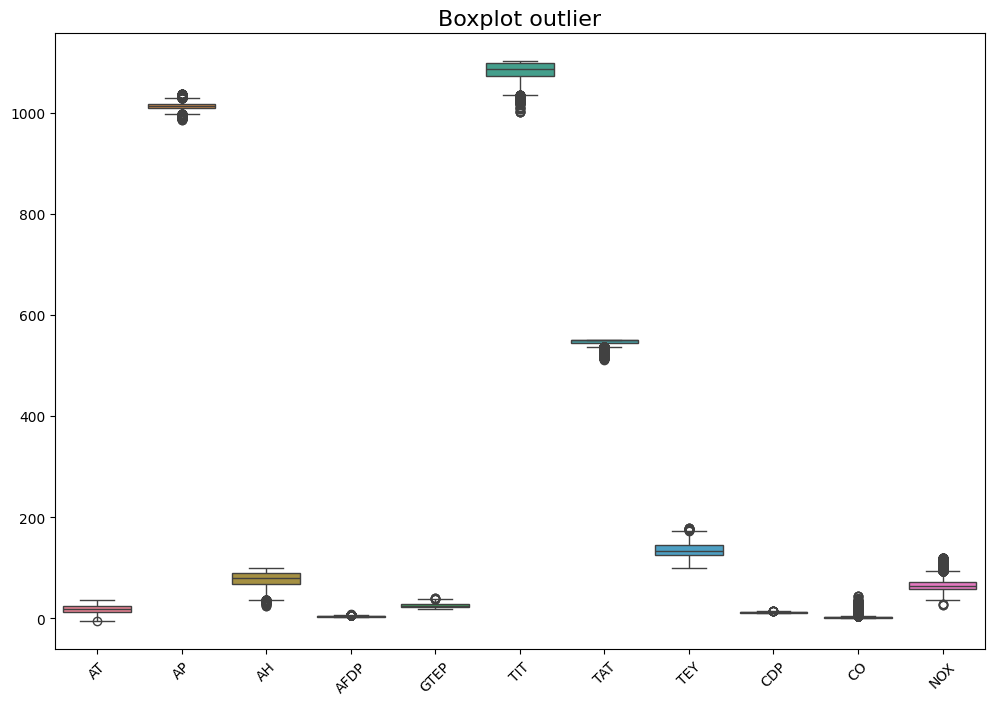

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[cols])
plt.title('Boxplot outlier', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# Kelompok Pekerjaan 2: Data Preparation

## Menghapus data duplikat

In [23]:
df = df.drop_duplicates()

In [24]:
df.duplicated().sum()

np.int64(0)

## Mengatasi outlier

In [25]:
df_cleaned = df.copy()
iqr_cols = cols

In [26]:
for col in iqr_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned[col] = df_cleaned[col].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )
    print(f"Atribut {col} done")

Atribut AT done
Atribut AP done
Atribut AH done
Atribut AFDP done
Atribut GTEP done
Atribut TIT done
Atribut TAT done
Atribut TEY done
Atribut CDP done
Atribut CO done
Atribut NOX done


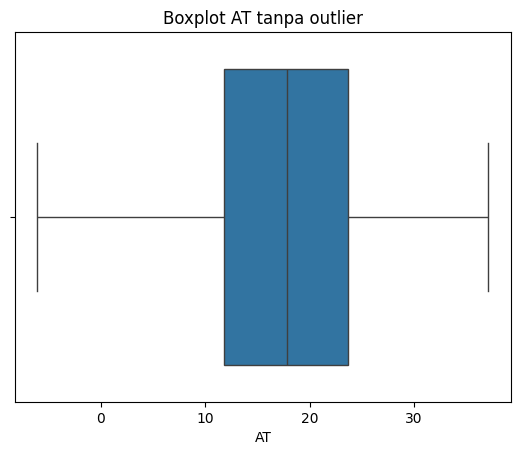

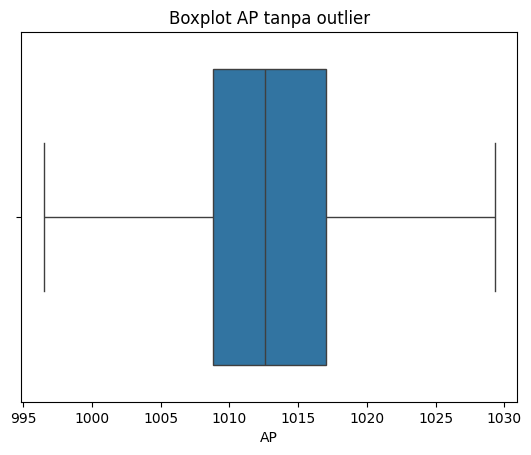

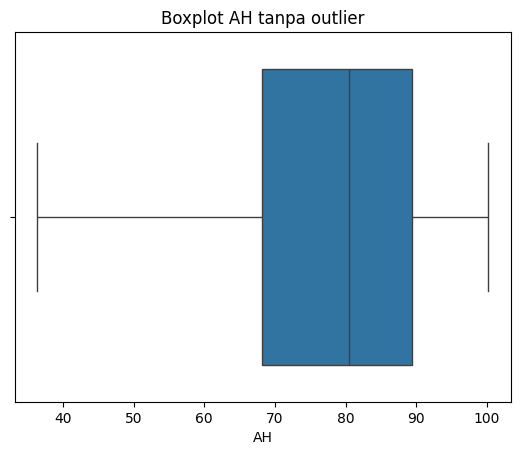

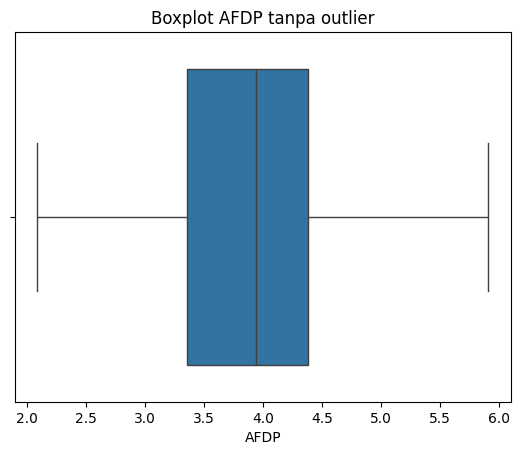

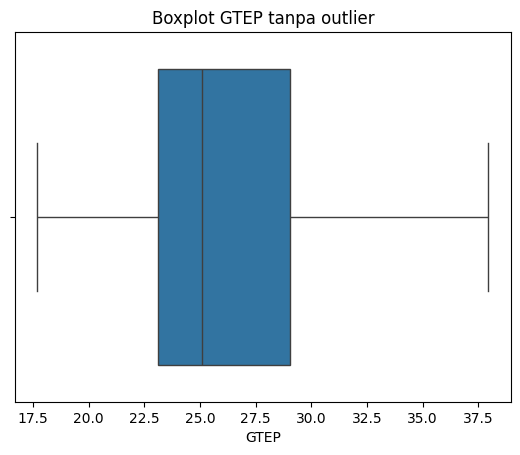

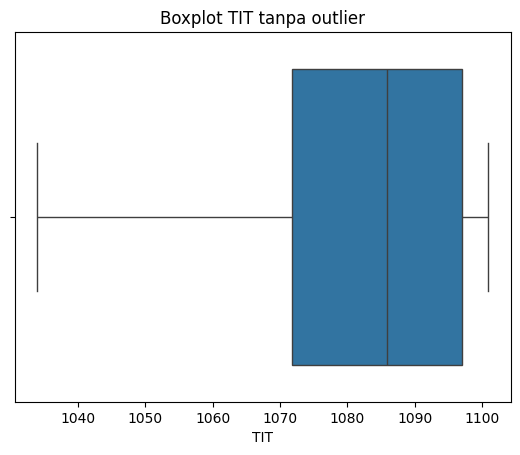

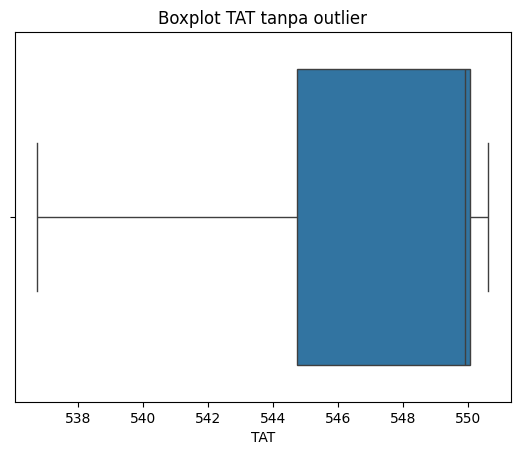

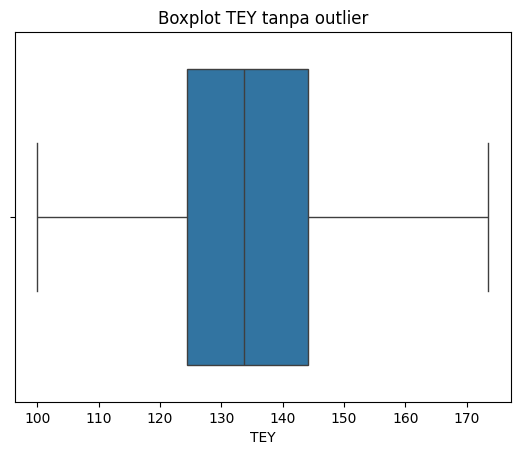

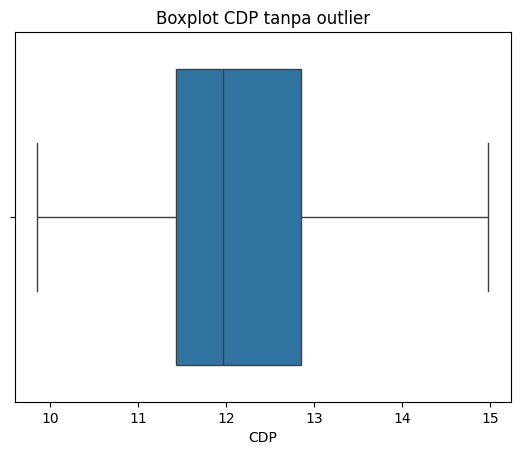

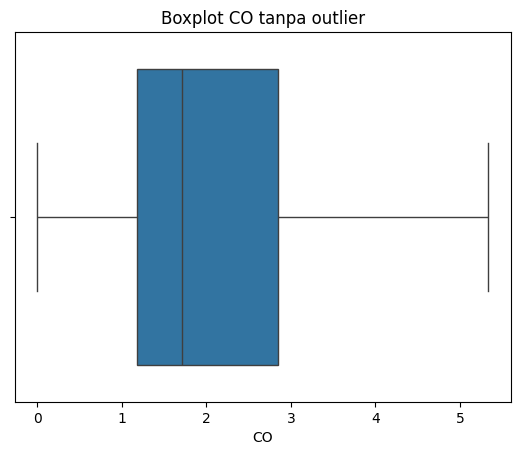

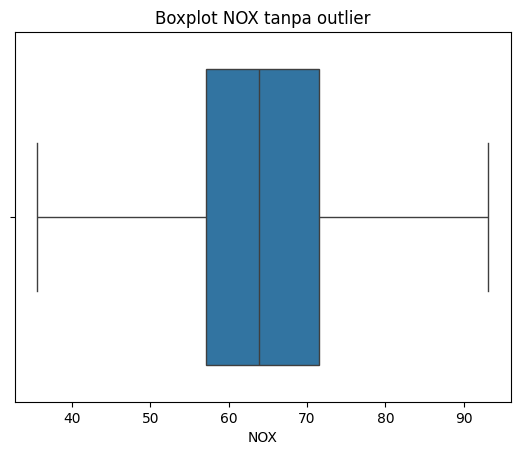

In [27]:
for col in cols:
    boxplot = sns.boxplot(data=df_cleaned, x=col)
    plt.title(f'Boxplot {col} tanpa outlier')
    plt.show()

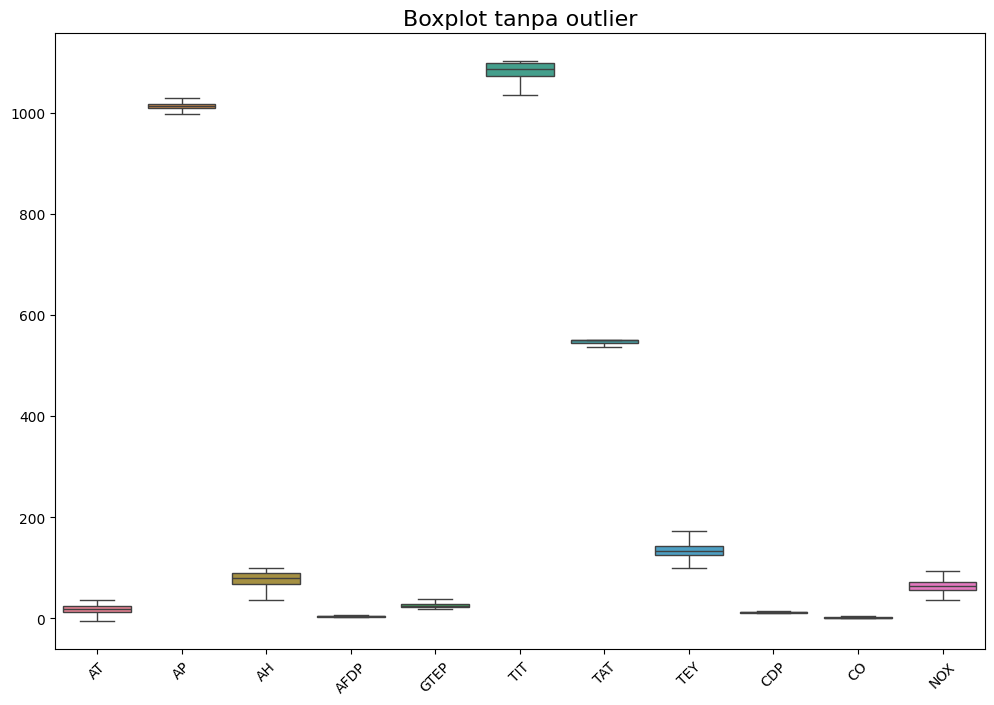

In [28]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned[cols])
plt.title('Boxplot tanpa outlier', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# Kelompok Pekerjaan 3: Model Evaluation

## Menentukan Label Data

In [29]:
output_class = ['CO', 'NOX']

In [30]:
y = df_cleaned['CO']
X = df_cleaned.drop(output_class, axis=1)

In [31]:
y.head(3)

0    0.32663
1    0.44784
2    0.45144
Name: CO, dtype: float64

In [32]:
X.head(3)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042


## Train test split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
print("X_train length: ", len(X_train))
print("X_test length: ", len(X_test))
print("y_train length: ", len(y_train))
print("y_test length: ", len(y_test))

X_train length:  29380
X_test length:  7346
y_train length:  29380
y_test length:  7346


## Menerapkan scaler pada atribut train dan test

In [35]:
scaler = MinMaxScaler()

In [36]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Membangun model

### Random forest regressor

In [37]:
RFR = RandomForestRegressor(n_estimators=100, random_state=42)

In [38]:
RFR.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Hasil

In [39]:
print("Score training: ", RFR.score(X_train, y_train))
print("Score testing: ", RFR.score(X_test, y_test))

Score training:  0.9768842518976495
Score testing:  0.8346307647164919


In [40]:
y_pred = RFR.predict(X_test)

In [41]:
print('MAE', mean_absolute_error(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared error', r2_score(y_test, y_pred))

MAE 0.38222737821385827
MSE 0.3326291532322789
RMSE 0.5767401089158607
R squared error 0.8346307647164919


##### Cross validation

In [42]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_RFR = cross_val_score(RFR, X, y, cv=cv)
print("Cross-validation scores:", cv_scores_RFR)
print("Mean cross-validation score:", cv_scores_RFR.mean())

Cross-validation scores: [0.83415278 0.82925651 0.83440379 0.83693643 0.83894115]
Mean cross-validation score: 0.8347381308810876


### XGBoost

In [43]:
XGBR = xgb.XGBRegressor(n_estimators=100, random_state=42)

In [44]:
XGBR.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


#### Hasil

In [45]:
print("Score training: ", XGBR.score(X_train, y_train))
print("Score testing: ", XGBR.score(X_test, y_test))

Score training:  0.8910085534240938
Score testing:  0.8105597046663422


In [46]:
y_pred_XGB = XGBR.predict(X_test)

In [47]:
print('MAE', mean_absolute_error(y_test, y_pred_XGB))
print('MSE', mean_squared_error(y_test, y_pred_XGB))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred_XGB)))
print('R squared error', r2_score(y_test, y_pred_XGB))

MAE 0.4213988893243895
MSE 0.38104648011994274
RMSE 0.6172896241797222
R squared error 0.8105597046663422


##### Cross validation

In [48]:
cv_scores_XGBR = cross_val_score(XGBR, X, y, cv=5)
print("Cross-validation scores:", cv_scores_XGBR)
print("Mean cross-validation score:", cv_scores_XGBR.mean())

Cross-validation scores: [0.06221279 0.67710644 0.66346137 0.16101506 0.16529731]
Mean cross-validation score: 0.3458185929231158


### KNN

In [49]:
rmse_scores = []
for n in range(1, 31):
    KNNR = KNeighborsRegressor(n_neighbors=n)
    KNNR.fit(X_train, y_train)
    y_pred_KNN = KNNR.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_KNN))
    rmse_scores.append(rmse)

optimal_n = rmse_scores.index(min(rmse_scores)) + 1
print(f"Optimal n_neighbors: {optimal_n}")

Optimal n_neighbors: 10


In [50]:
KNNR = KNeighborsRegressor(n_neighbors=optimal_n)
KNNR.fit(X_train_scaled, y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


#### Hasil

In [51]:
print("Score training: ", KNNR.score(X_train_scaled, y_train))
print("Score testing: ", KNNR.score(X_test_scaled, y_test))

Score training:  0.848292733270917
Score testing:  0.8070042773643634


In [52]:
X_scaled = scaler.fit_transform(X)

In [53]:
y_pred_KNN = KNNR.predict(X_test_scaled)

In [54]:
print('MAE', mean_absolute_error(y_test, y_pred_KNN))
print('MSE', mean_squared_error(y_test, y_pred_KNN))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred_KNN)))
print('R squared error', r2_score(y_test, y_pred_KNN))

MAE 0.41484463022869594
MSE 0.38819798427250546
RMSE 0.6230553621248319
R squared error 0.8070042773643634


##### Cross validation

In [55]:
cv_scores_knnr = cross_val_score(KNNR, X_scaled, y, cv=5)
print("Cross-validation scores:", cv_scores_knnr)
print("Mean cross-validation score:", cv_scores_knnr.mean())

Cross-validation scores: [-0.0238525   0.6866114   0.62338344  0.33558206  0.19814591]
Mean cross-validation score: 0.3639740600835534


## Komparasi ketiga model

In [56]:
rfr_cv_score = cv_scores_RFR.mean()
xgb_cv_score = cv_scores_XGBR.mean()
knnr_cv_score = cv_scores_knnr.mean()

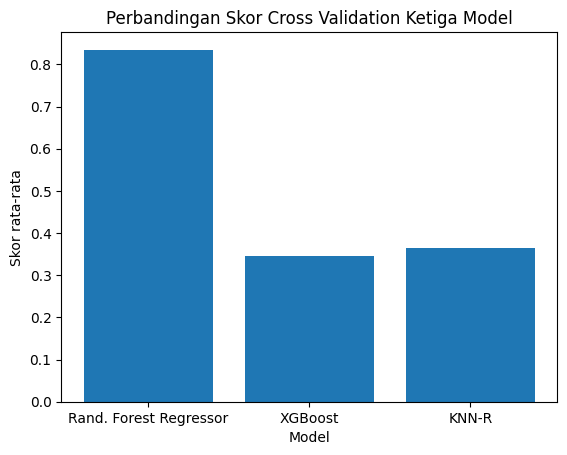

In [57]:
model = ['Rand. Forest Regressor', 'XGBoost', 'KNN-R']
scores = [rfr_cv_score, xgb_cv_score, knnr_cv_score]

plt.bar(model, scores)
plt.title('Perbandingan Skor Cross Validation Ketiga Model')
plt.xlabel('Model')
plt.ylabel('Skor rata-rata')
plt.show()

## Menyimpan model terbaik

In [59]:
joblib.dump(RFR, 'model_RFR_local.pkl', compress=3)

['model_RFR_local.pkl']